In [1]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

In [2]:
class neuralNetwork:
    def __init__(self, inputNodes , hiddenNodes , outputNodes, learningRate):
        self.iNodes = inputNodes
        self.hNodes = hiddenNodes
        self.oNodes = outputNodes
        
        self.lRate = learningRate
        
        self.wih = numpy.random.normal(0.0, pow(self.hNodes, -0.5),(self.hNodes, self.iNodes))
        self.who = numpy.random.normal(0.0, pow(self.oNodes, -0.5),(self.oNodes, self.hNodes))
        
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    def query(self,input_list):
        inputs = numpy.array(input_list, ndmin = 2).T
        hidden_inputs = numpy.dot(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
    
    def train(self,input_list,target_list):
        inputs = numpy.array(input_list, ndmin = 2).T
        targets = numpy.array(target_list, ndmin = 2).T
        hidden_inputs = numpy.dot(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        self.who += self.lRate * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)),numpy.transpose(hidden_outputs))

        self.wih += self.lRate * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        pass
    

In [3]:

input_nodes = 784
hidden_nodes = 200
output_nodes = 10

learning_rate = 0.2

n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [4]:
data_file = open("F:\TEst train\mnist_train.csv")
data_list = data_file.readlines()
data_file.close()

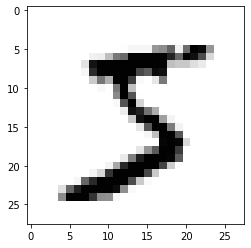

In [5]:
all_values = data_list[0].split(',')
image_array= numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [6]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [7]:
test_file = open("F:\TEst train\mnist_test.csv")
test_list = test_file.readlines()
test_file.close()

In [8]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass

In [9]:
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9682


In [10]:
scorecard_array

array([1, 1, 1, ..., 1, 1, 1])

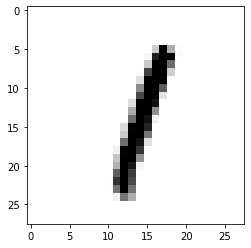

In [18]:
all_val = test_list[5].split(',')
image_array= numpy.asfarray(all_val[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [19]:
n.query((numpy.asfarray(all_val[1:]) / 255.0 * 0.99) + 0.01)

array([[0.00695478],
       [0.99350353],
       [0.00833991],
       [0.00325516],
       [0.01190556],
       [0.00886996],
       [0.00322849],
       [0.00529282],
       [0.00182214],
       [0.00394235]])